Load all packages you need.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import itertools
import pandas as pd
from sklearn.covariance import EllipticEnvelope



Read the dataset that you prepared yesterday afternoon (without outlier and missing data). 

In [2]:
data = pd.read_csv('C:\\Users\\v.weber\\Documents\\000 Master Wirtschaftsinformatik FU Berlin\\I\\Applied Analytics\\github stuff\\fork\\Applied-Analytics\\data\\data_after_monday.csv')

Let's try SOM on Age and Pregnancies. Don't forget the the variables should be normalized!

In [3]:
import numpy as np
import pandas as pd
from scipy.stats import boxcox

def normalize_skewed_variables(df, variables):
    normalized_df = df.copy()
    
    for var in variables:
        # Apply Box-Cox transformation (only for strictly positive values)
        if (df[var] > 0).all():
            transformed_data, _ = boxcox(df[var])
        else:
            transformed_data = np.log1p(df[var] - df[var].min() + 1)  # Log transform for non-positive values
        
        normalized_df[f"{var}_norm"] = (transformed_data - np.mean(transformed_data)) / np.std(transformed_data)

    return normalized_df

In [4]:
norm_df = normalize_skewed_variables(data, ['Age', 'Pregnancies'])

Perform the SOM algorithm (with minisom a well documented package is available on conda-forge). Tian, Azarian & Pecht (2014) suggest that a good estimation for the number of nodes in your map should be nodes = 5*sqrt(datapoints). Lets start with a 11x11 map structure and and define rectangular neighbourhood (only vertical and horizontal, no diagonal neighbours). Use a random seed for for reproducibility.  <br>
Step 1:Initialize your SOM. <br>
Stel 2: Train your SOM on 1000 iterations. <br>


In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from minisom import MiniSom

def som_clustering(df, variables):
    # Set random seed for reproducibility
    np.random.seed(42)

    # Select the data for the given variables
    data = df[variables].values

    # Calculate the number of nodes
    num_nodes = int(5 * np.sqrt(len(df)))

    # Initialize SOM with 11x11 grid and rectangular neighborhood
    som = MiniSom(x=11, y=11, input_len=data.shape[1], sigma=1.0, learning_rate=0.5, random_seed=42)
    som.train(data, 100, verbose=True)

    # Get the coordinates of the winning nodes for each data point
    win_map = np.array([som.winner(d) for d in data])

    # Create a scatter plot of the original data points
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=df[variables[0]], y=df[variables[1]], hue=win_map[:, 0], palette="tab10", legend=None, alpha=0.6)

    # Plot the SOM nodes as centers on the scatter plot
    for x in range(11):
        for y in range(11):
            # Plot each node in the SOM grid
            plt.scatter(som.get_weights()[x, y, 0], som.get_weights()[x, y, 1], marker='o', color='red', s=100, label=f'Node ({x},{y})' if (x == 0 and y == 0) else "")

    plt.title("SOM Visualization with Data Points and SOM Nodes")
    plt.xlabel(variables[0])
    plt.ylabel(variables[1])
    plt.show()

    return som

 [ 100 / 100 ] 100% - 0:00:00 left 
 quantization error: 0.22896529082904937


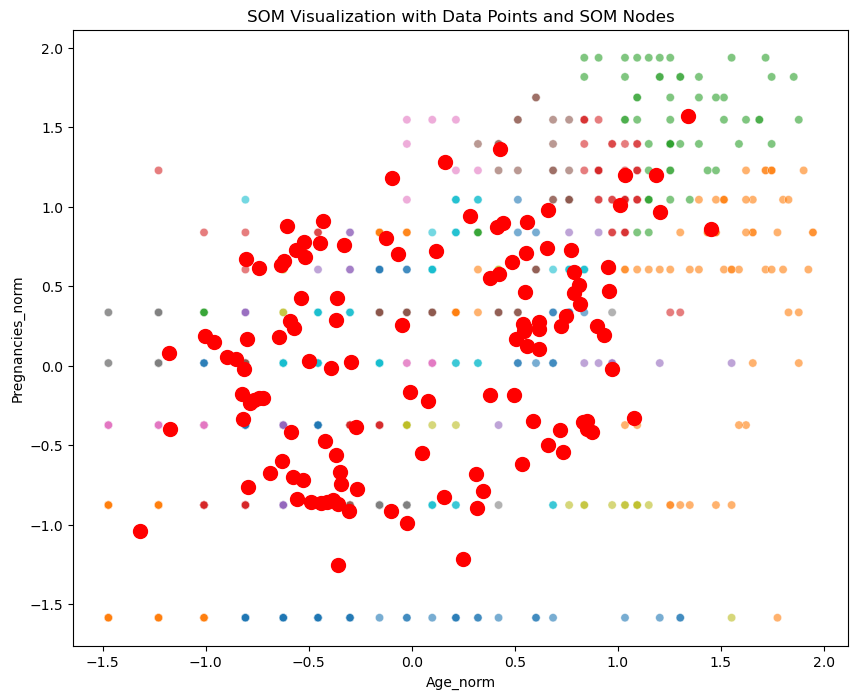

In [8]:
som = som_clustering(norm_df, ['Age_norm', 'Pregnancies_norm'])

Step 3: Plot the neighbourdhood distance of your trained SOM. How many cluster do you detect?

Step 4: Run K-Means on the nodes of your SOM. <br>
Step 5: Assign each data point to it's BMU's cluster label.<br>
Step 6: Plot clusters on scatterplot of "Age" vs "Pregnancies". Compare the clusters with the clusters determined by the K-Means algorithm during the previous coding break. 